In [2]:
import pandas as pd
df = pd.read_csv("dataset_tomat (4).csv")
df

,Harga,Hari,Cuaca,Promo,Total_Penjualan
0,8000,Senin,Cerah,Tidak,92
1,7500,Senin,Berawan,Tidak,88
2,12000,Selasa,Hujan,Ya,105
3,9500,Selasa,Mendung,Tidak,70
4,7000,Rabu,Cerah,Tidak,98
...,...,...,...,...,...
90,7000,Jumat,Mendung,Tidak,80
91,6500,Sabtu,Cerah,Ya,178
92,11200,Sabtu,Cerah,Tidak,130
93,11500,Minggu,Cerah,Tidak,138


In [3]:
df.shape

(95, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Harga            95 non-null     int64 
 1   Hari             95 non-null     object
 2   Cuaca            95 non-null     object
 3   Promo            95 non-null     object
 4   Total_Penjualan  95 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 3.8+ KB


In [5]:
df.isna().sum()

Harga              0
Hari               0
Cuaca              0
Promo              0
Total_Penjualan    0
dtype: int64

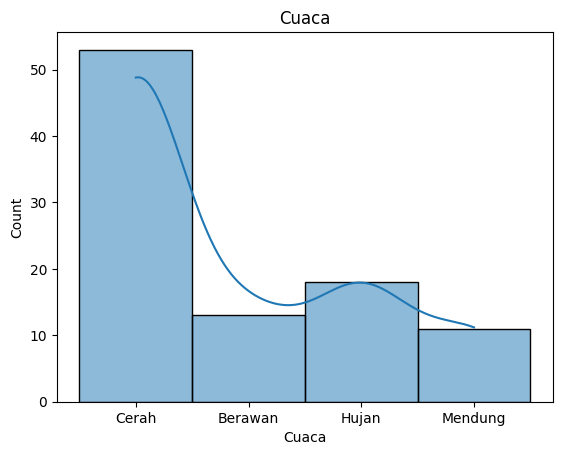

In [6]:
 import matplotlib.pyplot as plt
 import seaborn as sns
 sns.histplot(df["Cuaca"], kde=True)
 plt.title("Cuaca")
 plt.show()

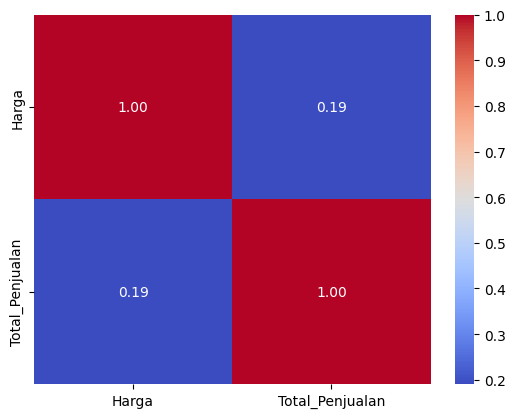

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

kolom_angka = df[["Harga","Total_Penjualan"]]
corr = kolom_angka.corr()

sns.heatmap(corr,annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


X = df[["Harga", "Hari", "Cuaca", "Promo"]]
y = df["Total_Penjualan"]

numeric_columns = ["Harga"]
categorical_columns = ["Hari", "Cuaca", "Promo"]

preprocessing = ColumnTransformer(
    transformers=[
        ("scaler", StandardScaler(), numeric_columns),
        ("OHE", OneHotEncoder(handle_unknown="ignore"), categorical_columns)
    ]
)

model_linear = Pipeline(
    steps=[
        ("preprocessing", preprocessing),
        ("model", LinearRegression())
    ]
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model_linear.fit(X_train, y_train)

y_pred = model_linear.predict(X_test)

print("R2 Score :", r2_score(y_test, y_pred))
print("MAE :", mean_absolute_error(y_test, y_pred))
print("MSE :", mean_squared_error(y_test, y_pred))

R2 Score : 0.9064850021518649
MAE : 8.17094197677559
MSE : 108.13545900754994


In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


X = df[["Harga", "Hari", "Cuaca", "Promo"]]
y = df["Total_Penjualan"]

numeric_columns = ["Harga"]
categorical_columns = ["Hari", "Cuaca", "Promo"]

preprocessing = ColumnTransformer(
    transformers=[
        ("scaler", StandardScaler(), numeric_columns),
        ("OHE", OneHotEncoder(handle_unknown="ignore"), categorical_columns)
    ]
)

model_tree = Pipeline(
    steps=[
        ("preprocessing", preprocessing),
        ("regressor",  DecisionTreeRegressor(
            random_state=42,
            max_depth=6
        ))
    ]
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model_linear.fit(X_train, y_train)

y_pred = model_linear.predict(X_test)

print("R2 Score :", r2_score(y_test, y_pred))
print("MAE :", mean_absolute_error(y_test, y_pred))
print("MSE :", mean_squared_error(y_test, y_pred))

R2 Score : 0.8056833077807589
MAE : 9.463157894736844
MSE : 224.69684210526316


In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


X = df[["Harga", "Hari", "Cuaca", "Promo"]]
y = df["Total_Penjualan"]

numeric_columns = ["Harga"]
categorical_columns = ["Hari", "Cuaca", "Promo"]

preprocessing = ColumnTransformer(
    transformers=[
        ("scaler", StandardScaler(), numeric_columns),
        ("OHE", OneHotEncoder(handle_unknown="ignore"), categorical_columns)
    ]
)

model_forest = Pipeline(
    steps=[
        ("preprocessing", preprocessing),
        ("ensemble", RandomForestRegressor(
            random_state=42,
            max_depth=6
        ))
    ]
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model_linear.fit(X_train, y_train)

y_pred = model_linear.predict(X_test)

print("R2 Score :", r2_score(y_test, y_pred))
print("MAE :", mean_absolute_error(y_test, y_pred))
print("MSE :", mean_squared_error(y_test, y_pred))

R2 Score : 0.9560047462882524
MAE : 5.137646580891024
MSE : 50.87362523388349


In [16]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_forest,X_train,y_train,cv=5,scoring="r2")
print("Scores : ",scores)
print("Mean Scores : ", scores.mean())


Scores :  [0.90913251 0.94418754 0.80803734 0.93681458 0.91498963]
Mean Scores :  0.9026323194235084


In [17]:
import joblib 

joblib.dump(model_forest,"model_forest.joblib")

['model_forest.joblib']

In [20]:
model_linear.fit(X_train, y_train)


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessing', ...), ('ensemble', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('scaler', ...), ('OHE', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transfor

In [21]:
import joblib
joblib.dump(model_linear, "model_forest.joblib")


['model_forest.joblib']

In [22]:
import joblib
import pandas as pd

model_forest = joblib.load("model_forest.joblib")

data_baru = pd.DataFrame(
    [[5000,"Selasa","Hujan","Tidak"]],
    columns=["Harga","Hari","Cuaca","Promo"]
)

prediksi = model_forest.predict(data_baru)[0]

print(f"Model memprediksi total penjualan {prediksi:.0f}")


Model memprediksi total penjualan 82
